In [1]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import pywt
import math

In [2]:
fileName=['a01','a02','a03','a04','a05','a06','a07','a08','a09','a10','a11','a12','a13','a14','a15','a16','a17','a18','a19','a20',
         'b01','b02','b03','b04','b05','c01','c02','c03','c04','c05','c06','c07','c08','c09','c10',
         'x01','x02','x03','x04','x05','x06','x07','x08','x09','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20']
mypath='C:/Users/sara/Documents/5anno/TESI/DataBase_PhysioNet/www.physionet.org/physiobank/database/apnea-ecg/'


In [3]:
def wrcoef(X, coef_type, coeffs, wavename, level):
    N = np.array(X).size
    a, ds = coeffs[0], list(reversed(coeffs[1:]))

    if coef_type =='a':
        return pywt.upcoef('a', a, wavename, level=level,take=N)[:N]
    elif coef_type == 'd':
        return pywt.upcoef('d', ds[level-1], wavename, level=level,take=N)[:N]
    else:
        raise ValueError("Invalid coefficient type: {}".format(coef_type))

In [28]:
#LEGGO I DATI ECG
medie2=[]
medie3=[]
medie4=[]
medie5=[]
stddev2=[]
stddev3=[]
stddev4=[]
stddev5=[]
index=0
file=[1,3,4,5,6,27,28,29,30]
for index in file:
    print(index)
    recordname=mypath+fileName[index]
    record = wfdb.rdsamp(recordname)
    dfECG=pd.DataFrame()
    ecg=record[0]
    Fs_ecg=record[1]['fs']
    intervallo=len(ecg)/(len(ecg)*Fs_ecg)
    time_ecg=[]
    for i in range(0,len(ecg)):
        time_ecg.append(intervallo*i)
    dfECG['time']=time_ecg
    dfECG['ecg']=ecg

    #APPLICO LA WAVELET
    wavelet = pywt.Wavelet('db4')
    from pywt import wavedec
    ecg=np.array(dfECG['ecg'])
    coeffs = wavedec(ecg, 'db4', level=5)
    level = 5
    A5 = wrcoef(ecg, 'a', coeffs, 'db4', level)
    D5 = wrcoef(ecg, 'd', coeffs, 'db4', level)
    D4 = wrcoef(ecg, 'd', coeffs, 'db4', 4)
    D3 = wrcoef(ecg, 'd', coeffs, 'db4', 3)
    D2 = wrcoef(ecg, 'd', coeffs, 'db4', 2)
    D1 = wrcoef(ecg, 'd', coeffs, 'db4', 1)
    stddev2.append(statistics.variance(D2))
    stddev3.append(statistics.variance(D3))
    stddev4.append(statistics.variance(D4))
    stddev5.append(statistics.variance(D5))


1
3
4
5
6
27
28
29
30


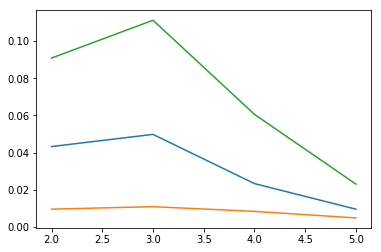

In [35]:
x=[2,3,4,5]
meanD2_apn=statistics.mean([stddev2[0],stddev2[1],stddev2[2],stddev2[3],stddev2[4]])
meanD2=statistics.mean([stddev2[5],stddev2[6],stddev2[7],stddev2[8]])
meanD3_apn=statistics.mean([stddev3[0],stddev3[1],stddev3[2],stddev3[3],stddev3[4]])
meanD3=statistics.mean([stddev3[5],stddev3[6],stddev3[7],stddev3[8]])
meanD4_apn=statistics.mean([stddev4[0],stddev4[1],stddev4[2],stddev4[3],stddev4[4]])
meanD4=statistics.mean([stddev4[5],stddev4[6],stddev4[7],stddev4[8]])
meanD5_apn=statistics.mean([stddev5[0],stddev5[1],stddev5[2],stddev5[3],stddev5[4]])
meanD5=statistics.mean([stddev5[5],stddev5[6],stddev5[7],stddev5[8]])
plt.plot(x,[meanD2_apn,meanD3_apn,meanD4_apn,meanD5_apn])
plt.plot(x,[meanD2,meanD3,meanD4,meanD5])
plt.plot(x,[stddev2[4],stddev3[4],stddev4[4],stddev5[4]])

In [27]:
len(stddev2)

4